In [1]:
# Import dependecies
import os
import pandas as pd
from PIL import Image
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# Read train.csv into a dataframe
train_df = pd.read_csv('train.csv')
train_df.head()

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


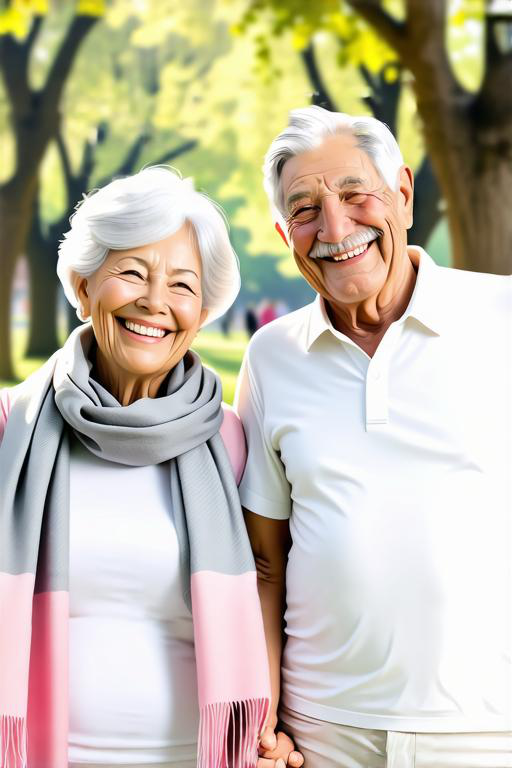

In [3]:
# Resize data
# Check path variable by opening an image file
path = 'original_data/'
for name in train_df['file_name'][:1]:
    img = Image.open(path + name)
    display(img)

In [5]:
# Run once
# # Resize all the images and copy to a new folder
# new_path = 'compressed_data/'
# for name in train_df['file_name']:
#     img = Image.open(path + name)
#     new_image = img.resize((64, 64), Image.LANCZOS)
#     new_image.save(new_path + name)

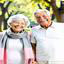

In [3]:
# Create a list of the compressed images
imgs = []

new_path = 'compressed_data/'

# Loop through the images and add them to the list
for name in train_df['file_name']:
    with Image.open(new_path + name) as img:
        imgs.append(img.copy())

# Check that the images are in the list
imgs[0]

In [5]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in imgs]

# Display the pixel values of the first image
print("Pixel Values:")
print(float_images[0])

Pixel Values:
[[[138. 139.   0.]
  [180. 183.   0.]
  [223. 227.  42.]
  ...
  [180. 179. 159.]
  [242. 242. 208.]
  [252. 253. 193.]]

 [[228. 229.  65.]
  [246. 248.  85.]
  [250. 254.  99.]
  ...
  [ 54.  53.  48.]
  [ 87.  86.  56.]
  [ 65.  69.   8.]]

 [[171. 170.  64.]
  [206. 208. 101.]
  [249. 252. 149.]
  ...
  [ 30.  27.  38.]
  [118. 116. 101.]
  [137. 139.  90.]]

 ...

 [[240. 139. 169.]
  [213. 134. 153.]
  [225. 159. 169.]
  ...
  [239. 238. 236.]
  [240. 236. 235.]
  [240. 236. 235.]]

 [[255. 153. 185.]
  [231. 143. 165.]
  [235. 167. 178.]
  ...
  [250. 249. 245.]
  [251. 247. 244.]
  [250. 246. 243.]]

 [[255. 153. 187.]
  [234. 142. 165.]
  [237. 167. 177.]
  ...
  [245. 244. 240.]
  [246. 242. 239.]
  [245. 241. 238.]]]


In [6]:
# Check the shape of the images in the dataset
shapes = set([img.shape for img in float_images])
shapes

{(64, 64), (64, 64, 3)}

In [7]:
# There are grayscale images, let's check how many
grayscale_imgs = []
for img in float_images:
    if img.shape != (64, 64, 3):
        grayscale_imgs.append(img)

len(grayscale_imgs)

176

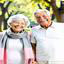

In [8]:
# Since there are only a handful, relatively, let's remake the imgs dataset converting the grayscale images to RGB
# Create a list of the compressed images
imgs = []

new_path = 'compressed_data/'

# Loop through the images and add them to the list
for name in train_df['file_name']:
    with Image.open(new_path + name).convert('RGB') as img:
        imgs.append(img.copy())

# Check that the images are in the list
imgs[0]

In [9]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in imgs]

# Display the pixel values of the first image
print("Pixel Values:")
print(float_images[0])

Pixel Values:
[[[138. 139.   0.]
  [180. 183.   0.]
  [223. 227.  42.]
  ...
  [180. 179. 159.]
  [242. 242. 208.]
  [252. 253. 193.]]

 [[228. 229.  65.]
  [246. 248.  85.]
  [250. 254.  99.]
  ...
  [ 54.  53.  48.]
  [ 87.  86.  56.]
  [ 65.  69.   8.]]

 [[171. 170.  64.]
  [206. 208. 101.]
  [249. 252. 149.]
  ...
  [ 30.  27.  38.]
  [118. 116. 101.]
  [137. 139.  90.]]

 ...

 [[240. 139. 169.]
  [213. 134. 153.]
  [225. 159. 169.]
  ...
  [239. 238. 236.]
  [240. 236. 235.]
  [240. 236. 235.]]

 [[255. 153. 185.]
  [231. 143. 165.]
  [235. 167. 178.]
  ...
  [250. 249. 245.]
  [251. 247. 244.]
  [250. 246. 243.]]

 [[255. 153. 187.]
  [234. 142. 165.]
  [237. 167. 177.]
  ...
  [245. 244. 240.]
  [246. 242. 239.]
  [245. 241. 238.]]]


In [10]:
# Since our image set should be standardized, let's check for any images that are out of place.

shapes = set([img.shape for img in float_images])
shapes

{(64, 64, 3)}

In [5]:
# To normalize images to a range between 0 and 1,
# we need to divide all pixel values by the max of 255

normalized_images = [img/255 for img in float_images]

# Display the pixel values of the first image
print("Pixel Values:")
print(normalized_images[0])

Pixel Values:
[[[0.5411765  0.54509807 0.        ]
  [0.7058824  0.7176471  0.        ]
  [0.8745098  0.8901961  0.16470589]
  ...
  [0.7058824  0.7019608  0.62352943]
  [0.9490196  0.9490196  0.8156863 ]
  [0.9882353  0.99215686 0.75686276]]

 [[0.89411765 0.8980392  0.25490198]
  [0.9647059  0.972549   0.33333334]
  [0.98039216 0.99607843 0.3882353 ]
  ...
  [0.21176471 0.20784314 0.1882353 ]
  [0.34117648 0.3372549  0.21960784]
  [0.25490198 0.27058825 0.03137255]]

 [[0.67058825 0.6666667  0.2509804 ]
  [0.80784315 0.8156863  0.39607844]
  [0.9764706  0.9882353  0.58431375]
  ...
  [0.11764706 0.10588235 0.14901961]
  [0.4627451  0.45490196 0.39607844]
  [0.5372549  0.54509807 0.3529412 ]]

 ...

 [[0.9411765  0.54509807 0.6627451 ]
  [0.8352941  0.5254902  0.6       ]
  [0.88235295 0.62352943 0.6627451 ]
  ...
  [0.9372549  0.93333334 0.9254902 ]
  [0.9411765  0.9254902  0.92156863]
  [0.9411765  0.9254902  0.92156863]]

 [[1.         0.6        0.7254902 ]
  [0.90588236 0.5607843

In [6]:
# Now we can call our preprocessed pixel data 'X'
X = normalized_images

# Slect the label column as 'y'
y = train_df['label']

# Check that the data has identical length
display(len(X), len(y))

79950

79950

In [47]:
# Confirm that our Y class is binaray.
y.nunique()

2

In [7]:
# Convert values to numpy arrays
X = np.array(X)
y = np.array(y)

In [8]:
# Now we'll split our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         # Random rotation (20 degrees)
    tf.keras.layers.RandomTranslation(0.1, 0.1), # Random horizontal and vertical shift
    tf.keras.layers.RandomZoom(0.2),             # Random zoom
    tf.keras.layers.RandomFlip('horizontal')     # Random horizontal flip
])

In [10]:
# Create an empty list for X and y augmentations
X_train_aug = []
y_train_aug = []

# Loop through the entire X_train set
for i in range(len(X_train)):
    # Select the original image and its y label
    img = X_train[i]
    label = y_train[i]

    # Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Add 5 new images for every original
    for j in range(1):
        # Create and append the image
        X_train_aug.append(data_augmentation(img, training=True)[0].numpy())
        # Append the original label
        y_train_aug.append(label)

# Print the length of the augmented images and the labels
print(len(X_train_aug))
print(len(y_train_aug))

319800
319800


In [11]:
# Create the dictionary
image_classifier_dict = {
    'X_train': X_train_aug,
    'X_test': X_test,
    'y_train': y_train_aug,
    'y_test': y_test
}

# Open a new file named 'img.pkl' with write permission
with open('ai_image_classifier_img.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(image_classifier_dict, file)

In [12]:
# Load the images from the pkl file
with open('ai_image_classifier_img.pkl', 'rb') as file:
    recalled_imgs = pickle.load(file)

type(recalled_imgs)

dict

In [15]:
# Check that the images are present.
len(recalled_imgs['X_train'])

319800